In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from math import cos, sin, sqrt, pi

In [109]:
m = 1300 #in kg
g = 9.8
b = 0.003 #b = beta * D
c = 10 #c = gamma*D^2
xi = 0
yi = 200
t = 0
tdelta = .1
vx = 8
vy = 0
ax = 0
ay = -g

In [110]:
def Fdragx(vx,vy):
    return -b*vx - c*np.sqrt(vx**2+vy**2)*vx
def Fdragy(vx,vy):
    return -b*vy - c*np.sqrt(vx**2+vy**2)*vy

In [111]:
x=xi
y=yi
tlist = []
xlist = []
ylist = []
vylist = []
vxlist = []
tlist.append(t)
xlist.append(x)
ylist.append(y)
vxlist.append(vx)
vylist.append(vy)

In [112]:
while y >= 0:
    ax = 0
    vx = vx + ax*tdelta
    x = .5*ax*tdelta + vx*tdelta + x
    xlist.append(x)
    vxlist.append(vx)
    
    ay = -g
    vy = vy + ay*tdelta
    y = .5*ay*tdelta*tdelta + vy*tdelta + y
    ylist.append(y)
    vylist.append(vy)
    
    t = t + tdelta
    tlist.append(t)
toriginal = len(tlist)
print("The size is: ", toriginal)
data = pd.DataFrame({"t": tlist, "x": xlist, "y": ylist, "vy": vylist, "vx": vxlist})
data

The size is:  64


,t,x,y,vy,vx
0,0.0,0.0,200.000,0.00,8.0
1,0.1,0.8,199.853,-0.98,8.0
2,0.2,1.6,199.608,-1.96,8.0
3,0.3,2.4,199.265,-2.94,8.0
4,0.4,3.2,198.824,-3.92,8.0
...,...,...,...,...,...
59,5.9,47.2,23.649,-57.82,8.0
60,6.0,48.0,17.720,-58.80,8.0
61,6.1,48.8,11.693,-59.78,8.0
62,6.2,49.6,5.568,-60.76,8.0


In [113]:
x = 0
y = 200
t = 0
tdelta = .1
vx = 8
vy = 0
b = 0.003
c = 0
tllist = []
xllist = []
yllist = []
vyllist = []
vxllist = []

In [114]:
tllist.append(t)
xllist.append(x)
yllist.append(y)
vxllist.append(vx)
vyllist.append(vy)

In [115]:
while y >= 0:
    ax = Fdragx(vx,vy)/m
    vx = vx + ax*tdelta
    x = x + vx*tdelta
    xllist.append(x)
    vxllist.append(vx)
    
    ay = -g + (Fdragy(vx,vy))/m
    vy = vy + ay*tdelta
    y = y + vy*tdelta
    yllist.append(y)
    vyllist.append(vy)
    
    t = t + tdelta
    tllist.append(t)
lindrag = pd.DataFrame({'t': tllist,'x': xllist,'y': yllist,'vx': vxllist,'vy': vyllist})
lindrag

,t,x,y,vx,vy
0,0.0,0.000000,200.000000,8.000000,0.000000
1,0.1,0.800000,199.902000,7.999998,-0.980000
2,0.2,1.599999,199.706000,7.999996,-1.960000
3,0.3,2.399999,199.412000,7.999994,-2.939999
4,0.4,3.199998,199.020000,7.999993,-3.919999
...,...,...,...,...,...
60,6.0,47.999662,20.660814,7.999889,-58.799600
61,6.1,48.799651,14.682855,7.999887,-59.779586
62,6.2,49.599639,8.606898,7.999886,-60.759572
63,6.3,50.399628,2.432942,7.999884,-61.739558


In [116]:
x = 0
y = 200
t = 0
tdelta = .1
vx = 8
vy = 0
b = 0
c = 10
tqlist = []
xqlist = []
yqlist = []
vxqlist = []
vyqlist = []

In [117]:
tqlist.append(t)
xqlist.append(x)
yqlist.append(y)
vxqlist.append(vx)
vyqlist.append(vy)

while y>=0:
    ax = Fdragx(vx,vy)/m
    vx = vx + ax*tdelta
    x = x + vx*tdelta
    xqlist.append(x)
    vxqlist.append(vx)
    
    ay = -g + (Fdragy(vx,vy)/m)
    vy = vy + ay*tdelta
    y = y + vy*tdelta
    yqlist.append(y)
    vyqlist.append(vy)
    
    t = t + tdelta
    tqlist.append(t)
quaddrag = pd.DataFrame({'t': tqlist,'x': xqlist,'y': yqlist,'vx': vxqlist,'vy': vyqlist})
quaddrag

,t,x,y,vx,vy
0,0.0,0.000000,200.000000,8.000000,0.000000
1,0.1,0.795077,199.902000,7.950769,-0.980000
2,0.2,1.585254,199.706600,7.901775,-1.953998
3,0.3,2.370484,199.414417,7.852299,-2.921835
4,0.4,3.150653,199.026106,7.801692,-3.883111
...,...,...,...,...,...
77,7.7,36.779197,12.255861,1.783105,-34.659664
78,7.8,36.952747,8.784418,1.735502,-34.714435
79,7.9,37.121657,5.307783,1.689101,-34.766345
80,8.0,37.286045,1.826229,1.643875,-34.815538


In [118]:
x = 0
y = 200
t = 0
tdelta = .1
vx = 8
vy = 0
b = 0.003
c = 10
tdlist = []
xdlist = []
ydlist = []
vxdlist = []
vydlist = []

In [119]:
tdlist.append(t)
xdlist.append(x)
ydlist.append(y)
vxdlist.append(vx)
vydlist.append(vy)

while y >= 0:
    ax = Fdragx(vx,vy)/m
    vx = vx + ax*tdelta
    x = x + vx*tdelta
    xdlist.append(x)
    vxdlist.append(vx)
    
    ay = -g + Fdragy(vx,vy)/m
    vy = vy + ay * tdelta
    y = y + vy*tdelta
    ydlist.append(y)
    vydlist.append(vy)
    
    t = t + tdelta
    tdlist.append(t)
drag = pd.DataFrame({'t': tdlist,'x': xdlist,'y': ydlist,'vy': vydlist,'vx': vxdlist})  
drag

,t,x,y,vy,vx
0,0.0,0.000000,200.000000,0.000000,8.000000
1,0.1,0.795077,199.902000,-0.980000,7.950767
2,0.2,1.585254,199.706600,-1.953997,7.901771
3,0.3,2.370483,199.414417,-2.921834,7.852293
4,0.4,3.150652,199.026106,-3.883110,7.801685
...,...,...,...,...,...
77,7.7,36.778981,12.256475,-34.659524,1.783082
78,7.8,36.952529,8.785046,-34.714294,1.735479
79,7.9,37.121437,5.308425,-34.766203,1.689078
80,8.0,37.285822,1.826886,-34.815396,1.643853


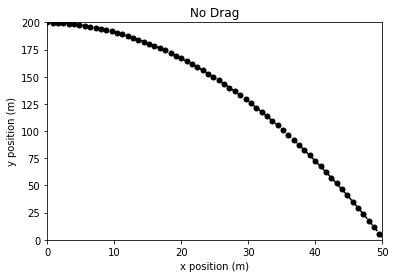

In [127]:
plt.plot(data['x'], data['y'], linestyle = '--', marker = 'o', color = 'k', markersize = 5, label = 'No Drag')
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.title("No Drag")
plt.xlim(0,50)
plt.ylim(0,200)
plt.show()

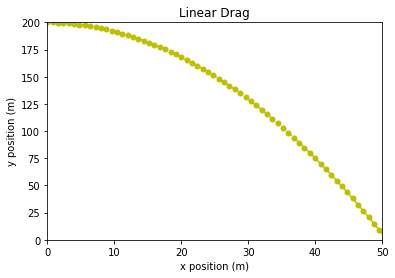

In [128]:
plt.plot(lindrag['x'], lindrag['y'], linestyle = '--', marker = 'o', color = 'y', markersize = 5, label = 'Linear Drag')
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.title("Linear Drag")
plt.xlim(0,50)
plt.ylim(0,200)
plt.show()

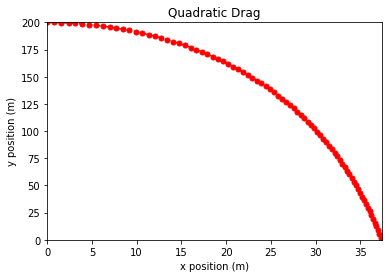

In [129]:
plt.plot(quaddrag['x'], quaddrag['y'], linestyle = '--', marker = 'o', color = 'r', markersize = 5)
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.title("Quadratic Drag")
plt.xlim(0,x)
plt.ylim(0,200)
plt.show()

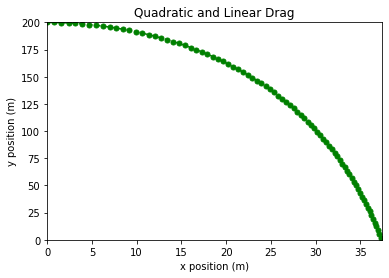

In [130]:
plt.plot(drag['x'], drag['y'], linestyle = '--', marker = 'o', color = 'g', markersize = 5)
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.title("Quadratic and Linear Drag")
plt.xlim(0,x)
plt.ylim(0,200)
plt.show()

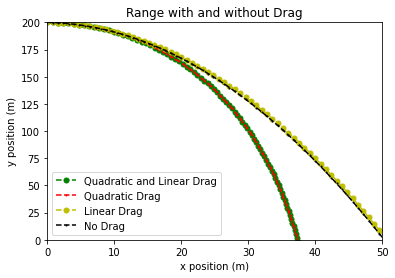

In [131]:
#Note that as a tesla is a large object, the quadratic or quadratic and linear drag is the most likely scenario
plt.plot(drag['x'], drag['y'], linestyle = '--', marker = 'o', color = 'g', markersize = 5, label = 'Quadratic and Linear Drag')
plt.plot(quaddrag['x'], quaddrag['y'], linestyle = '--', marker = 'o', color = 'r', markersize = 1, label = 'Quadratic Drag')
plt.plot(lindrag['x'], lindrag['y'], linestyle = '--', marker = 'o', color = 'y', markersize = 5, label = 'Linear Drag')
plt.plot(data['x'], data['y'], linestyle = '--', marker = 'o', color = 'k', markersize = 1, label = 'No Drag')
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.title("Range with and without Drag")
plt.xlim(0,50)
plt.ylim(0,200)
plt.legend()
plt.show()